# Simulation Script Loop Notebook

In [2]:
from agents import *
from environment import *
import numpy as np
from IPython.display import clear_output 
import time
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rc('font', size = 18)
plt.rc('text', usetex=True)

## Defaut Config

In [3]:
# Numbers
hv = 500         # n of HVs
av = 500       # n of AVs
N = 500           # n of Days

orig = '1'
dest = '9'

# Human Parameters
hv_err = 5        # error term on HV time perception ~N(0, hv_err)
hv_theta = .5     # rationality
hv_beta = .5      # prob of change route
hv_len = 100        # Memory lenth
hv_atis_bais = 0  # bias*prevTT + (1-bais)*memTT

# AV Parameters
av_err = 0
av_theta = 1
av_len = 1000     
av_atis_bias = 0
# no beta. all routes always concidered

# Square Network
roads = [Road('1', '2', 720, 20), Road('2', '3', 720, 12), Road('1', '4', 480, 15), Road('2', '5', 360, 12),
	Road('3', '6', 720, 12), Road('4', '5', 300, 10), Road('5', '6', 360, 12), Road('4', '7', 480, 15),
	Road('5', '8', 300, 10), Road('6', '9', 720, 30), Road('7', '8', 480, 15) ,Road('8', '9', 480, 15)]


## Loop

SIM: N=500,av=500,hv=500,hv_err=5,hv_theta=0.5,hv_beta=0.5,hv_len=100,hv_atis_bais=0.1,av_err=0,av_theta=1,av_len=1000,av_atis_bias=0
Loop 0/1: av_len=1000


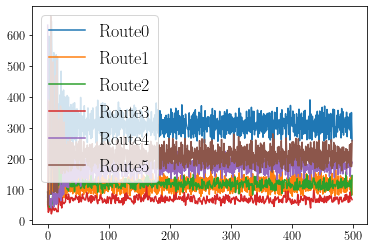

In [4]:
# hv theta loop
#variable = [1,2,3,4, 10, 30, 50, 70, 100, 250]
variable = [.1]

loop = 0
lenth = len(variable)
tables = []

# SET variable as loop var AND WIP var
for hv_atis_bais in variable:
    
    clear_output(wait=True) 
    print(f"SIM: {N=},{av=},{hv=},{hv_err=},{hv_theta=},{hv_beta=},{hv_len=},{hv_atis_bais=},{av_err=},{av_theta=},{av_len=},{av_atis_bias=}")

    print(f"Loop {loop}/{lenth}: {av_len=}")
    %run -i sim_script.py    # -i : Runs script in local this namespace
     
    tables.append(route_log)
    loop = loop + 1
    
# RESET VARIABLE AFTER USE
av_atis_bias = 0
hv_atis_bias = 0

for table in tables:
    table.plot()

## Plot

IndexError: list index out of range

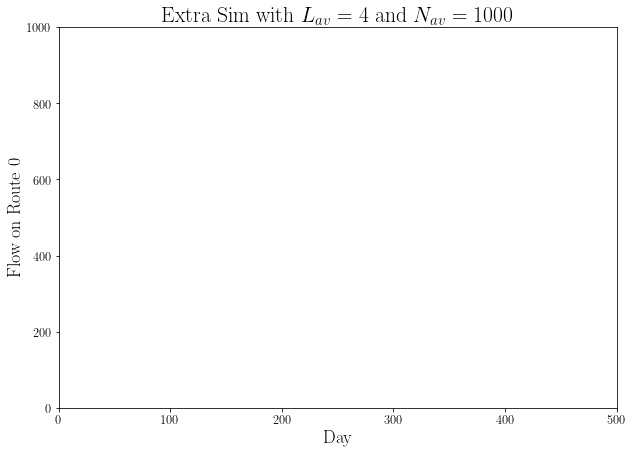

In [5]:
fig, ax = plt.subplots(figsize=(10,7))

ax.set(xlim=[0, 500], ylim=[0,1000], xlabel='Day', ylabel='Flow on Route 0',
       title= "Extra Sim with $L_{av} = 4$ and $N_{av} = 1000$" )

tables[2]['Route0'].plot(ax =ax, figsize=(10,7), xlim = [0,500])

#fig.savefig('figs/av_l_extra.png', transparent=False, dpi=200, bbox_inches="tight")